In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage import color, data, exposure, morphology
from skimage.color import label2rgb, rgb2gray
from skimage.filters import gaussian, threshold_local, threshold_otsu, try_all_threshold
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle, inpaint
from skimage.segmentation import slic
from skimage.transform import rotate, rescale
from skimage.util import random_noise

## Let's restore a damaged image

- In this exercise, we'll restore an image that has missing parts in it, using the inpaint_biharmonic() function.

- Small cute puppy: Loaded as defect_image. 

- We'll work on an image from the data module, obtained by data.astronaut(). Some of the pixels have been replaced with 0s using a binary mask, on purpose, to simulate a damaged image. Replacing pixels with 0s turns them totally black. The defective image is saved as an array called defect_image.

- The mask is a black and white image with patches that have the position of the image bits that have been corrupted. We can apply the restoration function on these areas. This mask is preloaded as mask.

- Remember that inpainting is the process of reconstructing lost or deteriorated parts of images and videos.

### Instructions 1/3
-    Import the inpaint function in the restoration module in scikit-image (skimage).

In [6]:
def show_image(image, title='Image restored'):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

def get_mask(image):
    ''' Creates mask with four defect regions '''
    mask = np.zeros(image.shape[:-1])
    mask[20:60, 0:20] = 1
    mask[160:180, 70:155] = 1
    mask[30:90, 310:350] = 1
    mask[350:390, 70:90] = 1
    return mask

defect_image = data.astronaut()

mask = get_mask(defect_image)

In [7]:
# Import the module from restoration
from skimage.restoration import inpaint

### Instructions 2/3
-    Show the defective image using show_image().

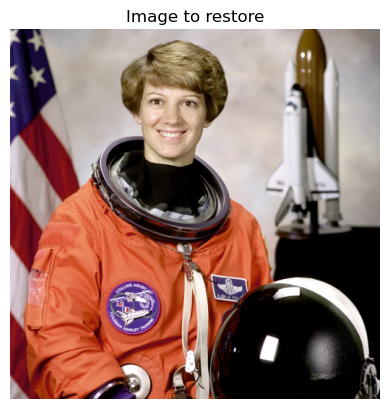

In [8]:
# Import the module from restoration
from skimage.restoration import inpaint

# Show the defective image
show_image(defect_image, 'Image to restore')

### Instructions 3/3
-    Call the correct function from inpaint. Use the corrupted image as the first parameter, then the mask and multichannel boolean.

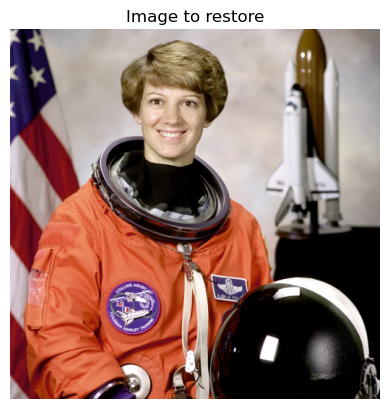

ValueError: Input arrays have to be the same shape

In [10]:
# Import the module from restoration
from skimage.restoration import inpaint

# Show the defective image
show_image(defect_image, 'Image to restore')

# Apply the restoration function to the image using the mask
#restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)
restored_image = inpaint.inpaint_biharmonic(defect_image, mask)
show_image(restored_image)

## Removing logos

- As we saw in the video, another use of image restoration is removing objects from an scene. In this exercise, we'll remove the Datacamp logo from an image.

- Landscape with small datacamp logo: Image loaded as image_with_logo. Image skipped

- You will create and set the mask to be able to erase the logo by inpainting this area.

- Remember that when you want to remove an object from an image you can either manually delineate that object or run some image analysis algorithm to find it.

### Instructions
-    Initialize a mask with the same shape as the image, using np.zeros().
-    In the mask, set the region that will be inpainted to 1 .
-    Apply inpainting to image_with_logo using the mask.

In [11]:
image_with_logo = plt.imread('./../../imgs/processing/4.2.06_w_logo_2_2.png')

In [13]:
# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:290, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
#                                  mask, multichannel=True)
                                  mask)

# Show the original and logo removed images
show_image(image_with_logo, 'Image with logo')
show_image(image_logo_removed, 'Image with logo removed')

ValueError: Input arrays have to be the same shape

## Let's make some noise!

- In this exercise, we'll practice adding noise to a fruit image.

- Various fruits: Image preloaded as fruit_image.  Image skipped

### Instructions
-    Import the util module and the random noise function.
-    Add noise to the image.
-    Show the original and resulting image.

In [15]:
fruit_image = plt.imread('./../../imgs/processing/fruits_square.jpg')

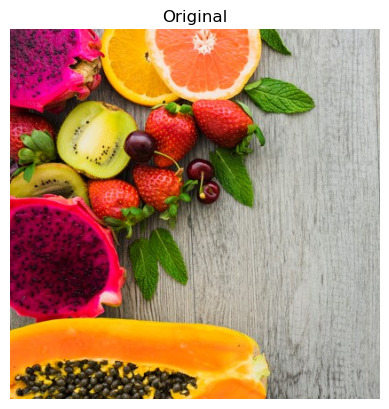

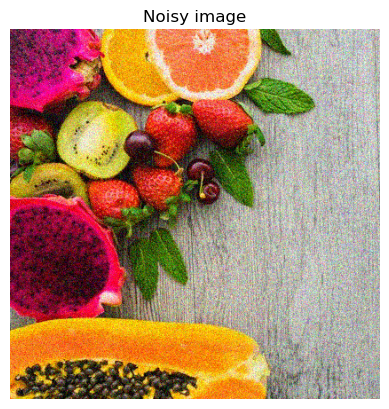

In [16]:
# Import the module and function
from skimage.util import random_noise

# Add noise to the image
noisy_image = random_noise(fruit_image)

# Show original and resulting image
show_image(fruit_image, 'Original')
show_image(noisy_image, 'Noisy image')

## Reducing noise

- We have a noisy image that we want to improve by removing the noise in it.

- Small cute puppy, Preloaded as noisy_image.  Image skipped

- Use total variation filter denoising to accomplish this.

### Instructions
-    Import the denoise_tv_chambolle function from its module.
-    Apply total variation filter denoising.
-    Show the original noisy and the resulting denoised image.

In [18]:
noisy_image = plt.imread('./../../imgs/processing/miny.jpeg')

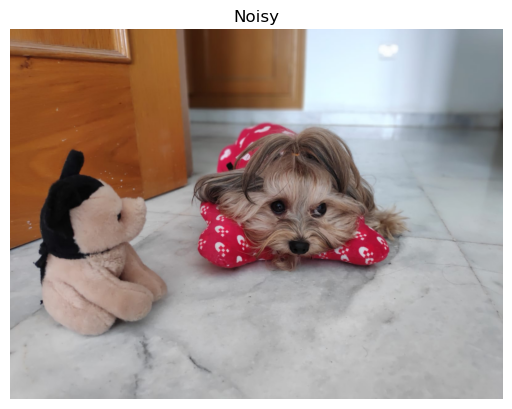

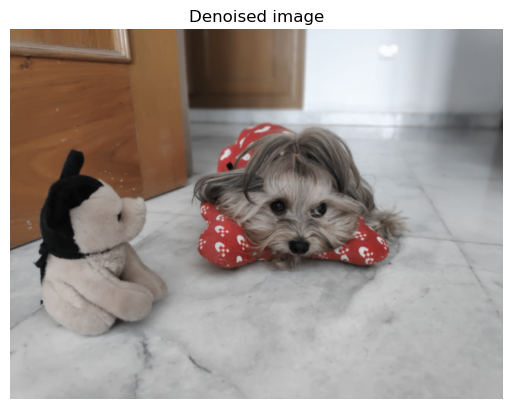

In [20]:
# Import the module and function
from skimage.restoration import denoise_tv_chambolle

# Apply total variation filter denoising
#denoised_image = denoise_tv_chambolle(noisy_image, multichannel=True)
denoised_image = denoise_tv_chambolle(noisy_image)

# Show the noisy and denoised images
show_image(noisy_image, 'Noisy')
show_image(denoised_image, 'Denoised image')

## Reducing noise while preserving edges

- In this exercise, you will reduce the noise in this landscape picture.

- Landscape of a river, Preloaded as landscape_image.  Image skipped

- Since we prefer to preserve the edges in the image, we'll use the bilateral denoising filter.

### Instructions
-    Import the denoise_bilateral function from its module.
-    Apply bilateral filter denoising.
-    Show the original noisy and the resulting denoised image.

In [23]:
landscape_image = plt.imread('./../../imgs/processing/noise-noisy-nature.jpg')

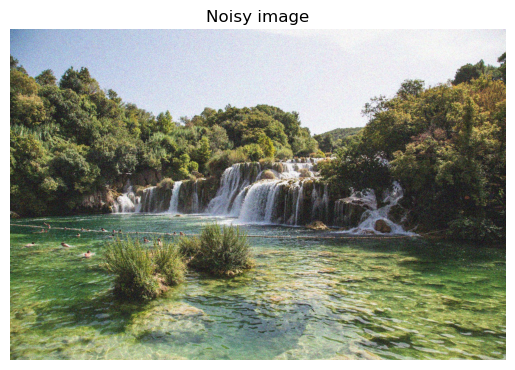

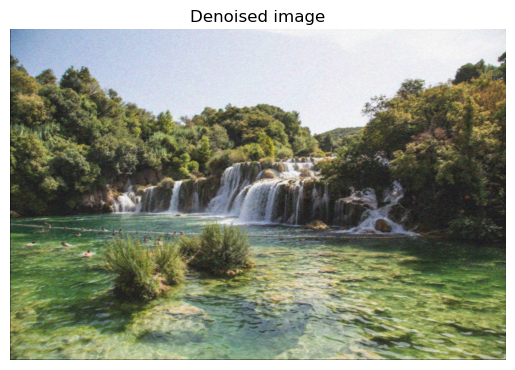

In [26]:
# Import bilateral denoising function
from skimage.restoration import denoise_bilateral

# Apply bilateral filter denoising
#denoised_image = denoise_bilateral(landscape_image, multichannel=True)
denoised_image = denoise_bilateral(landscape_image, channel_axis=-1)

# Show original and resulting images
show_image(landscape_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')

## Superpixel segmentation

- In this exercise, you will apply unsupervised segmentation to the same image, before it's passed to a face detection machine learning model.

- So you will reduce this image from 265 * 191 = 50615 pixels down to 400 regions.

- Young woman, Already preloaded as face_image. Image skipped

- The show_image() function has been preloaded for you as well.

### Instructions
-    Import the slic() function from the segmentation module.
-    Import the label2rgb() function from the color module.
-    Obtain the segmentation with 400 regions using slic().
-    Put segments on top of original image to compare with label2rgb().

In [27]:
face_image = plt.imread('./../../imgs/processing/chinese.jpg')

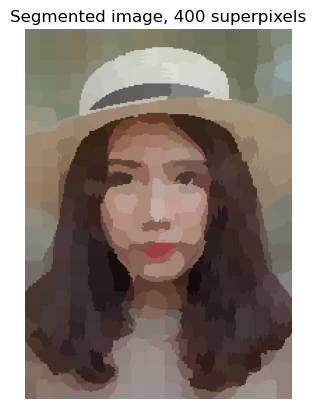

In [29]:
# Import the slic function from segmentation module
from skimage.segmentation import slic

# Import the label2rgb function from color module
from skimage.color import label2rgb

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments= 400)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
show_image(segmented_image, "Segmented image, 400 superpixels")

## Contouring shapes

- In this exercise we'll find the contour of a horse.

- For that we will make use of a binarized image provided by scikit-image in its data module. Binarized images are easier to process when finding contours with this algorithm. Remember that contour finding only supports 2D image arrays.

- Once the contour is detected, we will display it together with the original image. That way we can check if our analysis was correct!

- show_image_contour(image, contours) is a preloaded function that displays the image with all contours found using Matplotlib. Shape of a horse in black and white, Image skipped

- Remember you can use the find_contours() function from the measure module, by passing the thresholded image and a constant value.

### Instructions
-    Import the data and the module needed for contouring detection.
-    Obtain the horse image shown in the context area.
-    Find the contours of the horse image using a constant level value of 0.8.

In [31]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')
    plt.show()

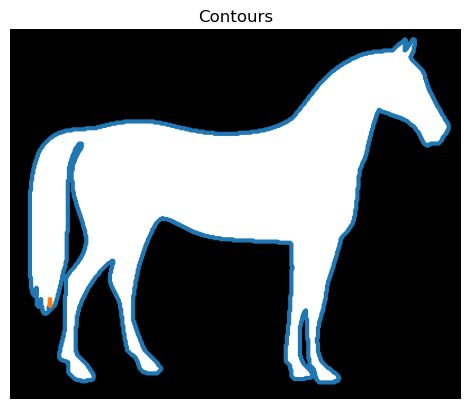

In [32]:
# Import the modules
from skimage import data, measure

# Obtain the horse image
horse_image = data.horse()

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, 0.8)

# Shows the image with contours found
show_image_contour(horse_image, contours)

## Find contours of an image that is not binary

- Let's work a bit more on how to prepare an image to be able to find its contours and extract information from it.

- We'll process an image of two purple dice loaded as image_dice and determine what number was rolled for each dice.  Purple dice, image skipped

- In this case, the image is not grayscale or binary yet. This means we need to perform some image pre-processing steps before looking for the contours. First, we'll transform the image to a 2D array grayscale image and next apply thresholding. Finally, the contours are displayed together with the original image.

- color, measure and filters modules are already imported so you can use the functions to find contours and apply thresholding.

- We also import the io module to load the image_dice from local memory, using imread. Read more here.

### Instructions 1/4
-    Transform the image to grayscale using rgb2gray().

In [47]:
image_dice = plt.imread('./../../imgs/processing/dices.png')

In [48]:
# Make the image grayscale
#image_dice = color.rgb2gray(image_dice)
image_dice = color.rgb2gray(image_dice[:,:,:3])

### Instructions 2/4
-    Obtain the optimal threshold value for the image and set it as thresh.

In [49]:
image_dice = plt.imread('./../../imgs/processing/dices.png')

In [50]:
# Make the image grayscale
#image_dice = color.rgb2gray(image_dice)
image_dice = color.rgb2gray(image_dice[:,:,:3])

# Obtain the optimal thresh value
#thresh = filters.threshold_otsu(image_dice)
thresh = threshold_otsu(image_dice)

### Instructions 3/4
-    Apply thresholding to the image once you have the optimal threshold value thresh, using the corresponding operator.

In [52]:
image_dice = plt.imread('./../../imgs/processing/dices.png')

In [53]:
# Make the image grayscale
#image_dice = color.rgb2gray(image_dice)
image_dice = color.rgb2gray(image_dice[:,:,:3])

# Obtain the optimal thresh value
#thresh = filters.threshold_otsu(image_dice)
thresh = threshold_otsu(image_dice)

# Apply thresholding
binary = image_dice > thresh

### Instructions 4/4
-    Apply the corresponding function to obtain the contours and use a value level of 0.8.

In [55]:
image_dice = plt.imread('./../../imgs/processing/dices.png')

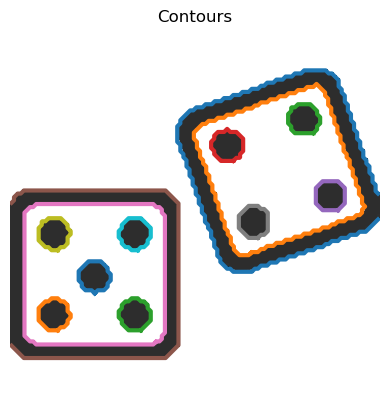

In [56]:
# Make the image grayscale
#image_dice = color.rgb2gray(image_dice)
image_dice = color.rgb2gray(image_dice[:,:,:3])

# Obtain the optimal thresh value
#thresh = filters.threshold_otsu(image_dice)
thresh = threshold_otsu(image_dice)

# Apply thresholding
binary = image_dice > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, 0.8)

# Show the image
show_image_contour(image_dice, contours)

## Count the dots in a dice's image

- Now we have found the contours, we can extract information from it.

- In the previous exercise, we prepared a purple dices image to find its contours: (3 images showing the steps to find contours, image skipped)

- This time we'll determine what number was rolled for the dice, by counting the dots in the image.

- The contours found in the previous exercise are preloaded as contours.

- Create a list with all contour's shapes as shape_contours. You can see all the contours shapes by calling shape_contours in the console, once you have created it.

- Check that most of the contours aren't bigger in size than 50. If you count them, they are the exact number of dots in the image.

- show_image_contour(image, contours) is a preloaded function that displays the image with all contours found using Matplotlib.

### Instructions
-    Make shape_contours be a list with all contour shapes of contours.
-    Set max_dots_shape to 50.
-    Set the shape condition of the contours to be the maximum shape size of the dots max_dots_shape.
-    Print the dice's number.

In [57]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=5, color='green')
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title('Contours')
    plt.axis('off')
    plt.show()

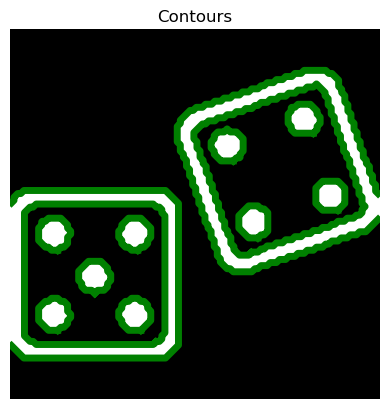

Dice's dots number: 9. 


In [58]:
# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found 
show_image_contour(binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))